In [4]:
import random, os, sys
from datetime import datetime
import pandas as pd
import csv
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Import DataSet

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/pravallika-pilla/DataScience/main/PowerGeneration.csv')

Initial View of DataSet

In [9]:
df.head()

,Date,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW),Deviation (MW)
0,01-09-2017,Delhi,2235.4,135.0,0.0,135.0,0.0,13.29,18.29,5.00,37.62
1,01-09-2017,STPL,1350.0,1350.0,0.0,1350.0,0.0,0.00,0.00,0.00,0.00
2,01-09-2017,SPPL,150.0,150.0,0.0,150.0,0.0,0.00,0.00,0.00,0.00
3,01-09-2017,SPL,3960.0,0.0,0.0,0.0,0.0,92.13,96.16,4.03,4.37
4,01-09-2017,SKS,600.0,300.0,0.0,300.0,0.0,6.84,7.18,0.34,4.97


#What are the data types? (Only numeric and categorical)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334994 entries, 0 to 334993
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date                              334994 non-null  object 
 1   Power Station                     334994 non-null  object 
 2   Monitored Cap.(MW)                334994 non-null  float64
 3   Total Cap. Under Maintenace (MW)  334994 non-null  float64
 4   Planned Maintanence (MW)          334994 non-null  float64
 5   Forced Maintanence(MW)            334994 non-null  float64
 6   Other Reasons (MW)                334994 non-null  float64
 7   Programme (MW)                    334994 non-null  float64
 8   Actual (MW)                       334994 non-null  float64
 9   Excess(+) / Shortfall (-) (MW)    334994 non-null  float64
 10  Deviation (MW)                    334994 non-null  float64
dtypes: float64(9), object(2)
memory usage: 28.1+ MB


#Are there missing values?

In [11]:
df.isnull().sum()

Date                                0
Power Station                       0
Monitored Cap.(MW)                  0
Total Cap. Under Maintenace (MW)    0
Planned Maintanence (MW)            0
Forced Maintanence(MW)              0
Other Reasons (MW)                  0
Programme (MW)                      0
Actual (MW)                         0
Excess(+) / Shortfall (-) (MW)      0
Deviation (MW)                      0
dtype: int64

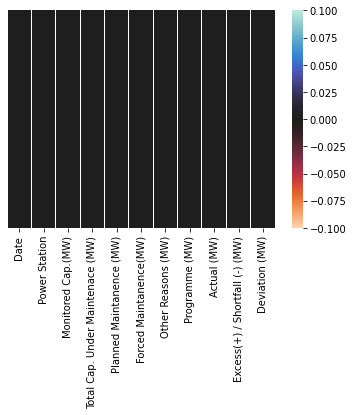

In [12]:
sns.heatmap(df.isnull(), yticklabels=False,cmap='icefire_r')

#What are the likely distributions of the numeric variables?

In [13]:
df.columns

Index(['Date', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
       'Actual (MW)', 'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)'],
      dtype='object')

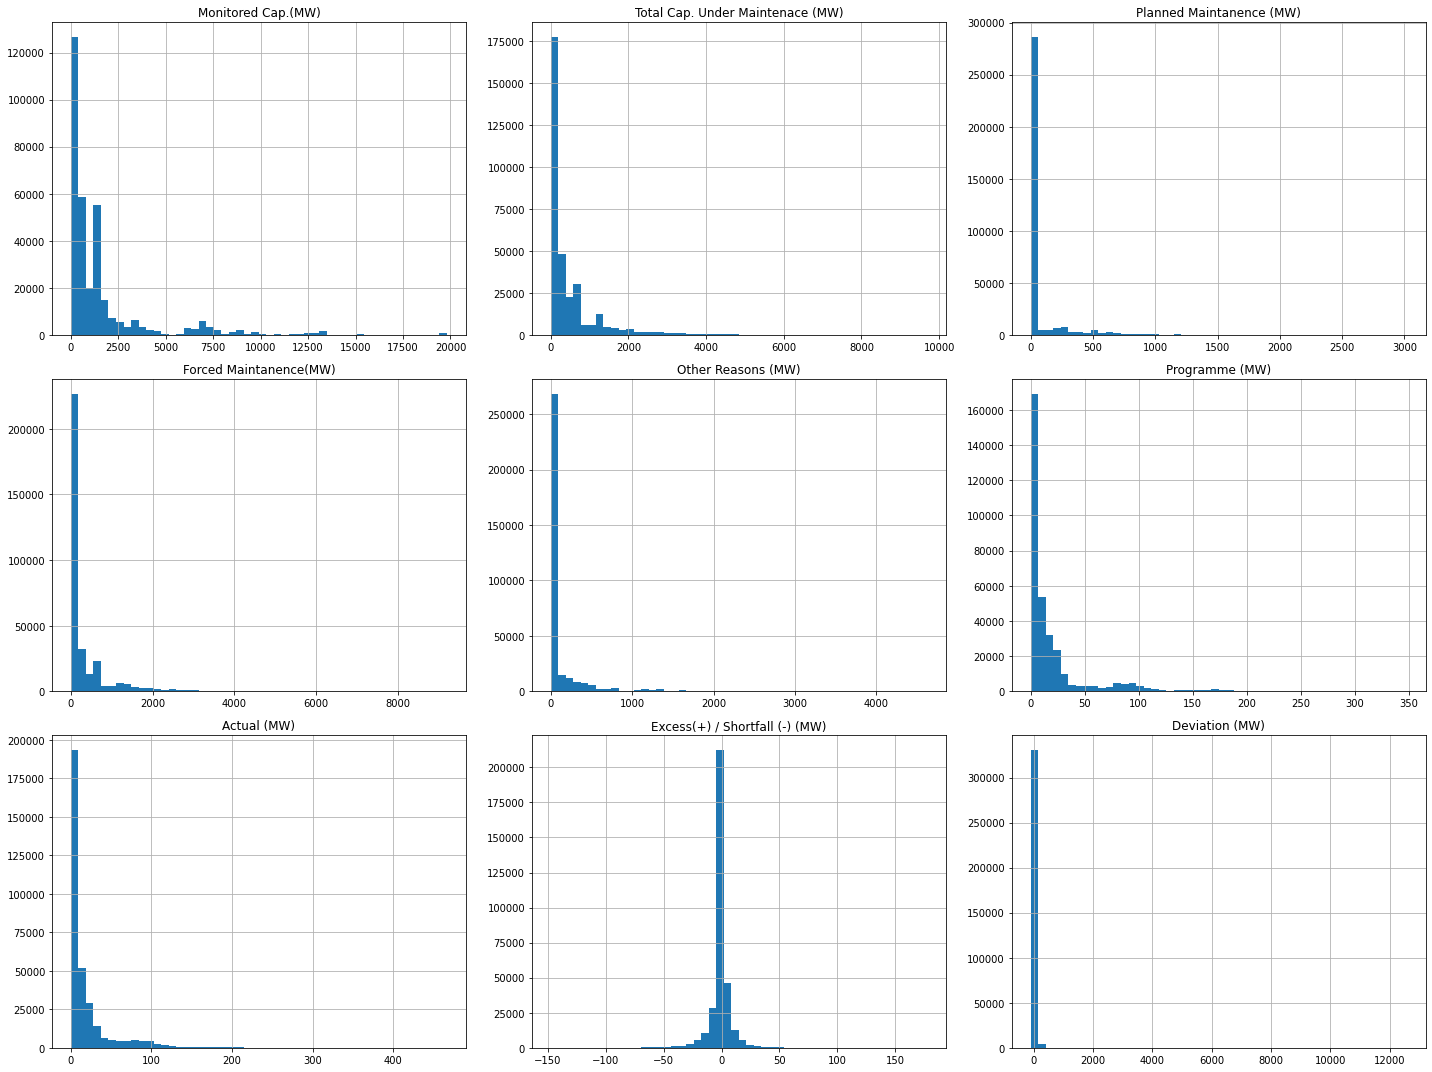

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [15]:
df1 = df.select_dtypes(include=['float64'])

In [16]:
df1.head(5)

,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW),Deviation (MW)
0,2235.4,135.0,0.0,135.0,0.0,13.29,18.29,5.00,37.62
1,1350.0,1350.0,0.0,1350.0,0.0,0.00,0.00,0.00,0.00
2,150.0,150.0,0.0,150.0,0.0,0.00,0.00,0.00,0.00
3,3960.0,0.0,0.0,0.0,0.0,92.13,96.16,4.03,4.37
4,600.0,300.0,0.0,300.0,0.0,6.84,7.18,0.34,4.97


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17c5969f10>,
      dtype=object)

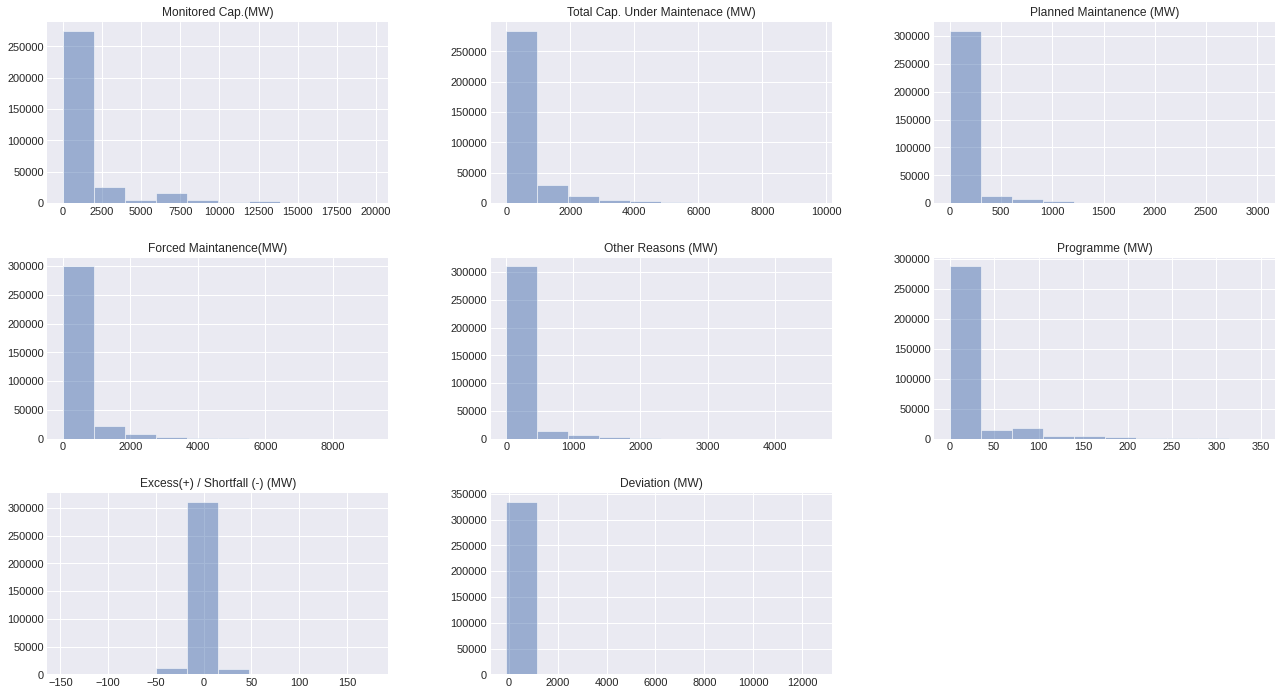

In [70]:
plt.style.use('seaborn-dark')
X.hist(alpha=0.5, figsize=(22, 12))

#Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [19]:
df.head()

,Date,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW),Deviation (MW)
0,01-09-2017,Delhi,2235.4,135.0,0.0,135.0,0.0,13.29,18.29,5.00,37.62
1,01-09-2017,STPL,1350.0,1350.0,0.0,1350.0,0.0,0.00,0.00,0.00,0.00
2,01-09-2017,SPPL,150.0,150.0,0.0,150.0,0.0,0.00,0.00,0.00,0.00
3,01-09-2017,SPL,3960.0,0.0,0.0,0.0,0.0,92.13,96.16,4.03,4.37
4,01-09-2017,SKS,600.0,300.0,0.0,300.0,0.0,6.84,7.18,0.34,4.97


In [20]:
corr_data = df.corr()
corr_y = corr_data["Actual (MW)"]
corr_y.sort_values(ascending = False)

Actual (MW)                         1.000000
Programme (MW)                      0.967394
Monitored Cap.(MW)                  0.939238
Total Cap. Under Maintenace (MW)    0.602873
Forced Maintanence(MW)              0.529060
Planned Maintanence (MW)            0.517801
Other Reasons (MW)                  0.186730
Excess(+) / Shortfall (-) (MW)      0.180014
Deviation (MW)                      0.060733
Name: Actual (MW), dtype: float64

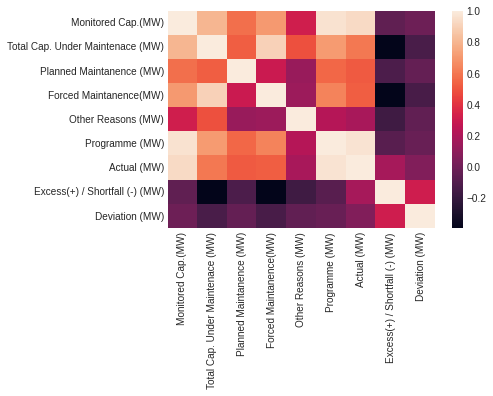

In [21]:
sns.heatmap(df.corr())

In [22]:
X = df.iloc[:,2:-1]

y = df.iloc[:,-1]

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)
X_sc =pd.DataFrame(X_sc,index= X.index, columns= X.columns)
X_s = X_sc # backup used later
X_sc.head()

,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW)
0,0.248603,-0.404685,-0.320483,-0.261304,-0.358624,-0.184385,-0.036437,0.572652
1,-0.088728,1.042445,-0.320483,1.598261,-0.358624,-0.534262,-0.511417,0.061424
2,-0.545920,-0.386819,-0.320483,-0.238347,-0.358624,-0.534262,-0.511417,0.061424
3,0.905663,-0.565477,-0.320483,-0.467923,-0.358624,1.891181,1.985797,0.473474
4,-0.374473,-0.208161,-0.320483,-0.008771,-0.358624,-0.354190,-0.324957,0.096187


Apply VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_sc.columns
    vif["VIF"] = [variance_inflation_factor(X_sc.values, i) for i in range(X_sc.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return(vif)
calc_vif(X_sc)

,variables,VIF
1,Total Cap. Under Maintenace (MW),3.334765e+12
3,Forced Maintanence(MW),2.019551e+12
4,Other Reasons (MW),3.891135e+11
2,Planned Maintanence (MW),2.017651e+11
6,Actual (MW),1.376397e+10
5,Programme (MW),1.339329e+10
7,Excess(+) / Shortfall (-) (MW),8.879252e+08
0,Monitored Cap.(MW),3.969510e+01


In [25]:
def drop_large_vif(a):
    calc_vif(a)
    for i in range(len(a.columns)-1):
        col = calc_vif(a).iloc[0,0]
        val = calc_vif(a).iloc[0,1]
        if val > 10:
            a.drop(col,axis=1,inplace=True)
    return calc_vif(a)
    
drop_large_vif(X_sc)

,variables,VIF
3,Programme (MW),2.509251
1,Forced Maintanence(MW),2.167590
0,Planned Maintanence (MW),1.479201
4,Excess(+) / Shortfall (-) (MW),1.323244
2,Other Reasons (MW),1.086680


Method 3

In [73]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

ValueError: ignored

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

#Do the training and test sets have the same data?

In [29]:
from sklearn.model_selection import train_test_split

In [72]:
X = df[['Date', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
        'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)']]
y = df[['Actual (MW)']]

In [74]:
df.columns

Index(['Date', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
       'Actual (MW)', 'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)'],
      dtype='object')

In [33]:
#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

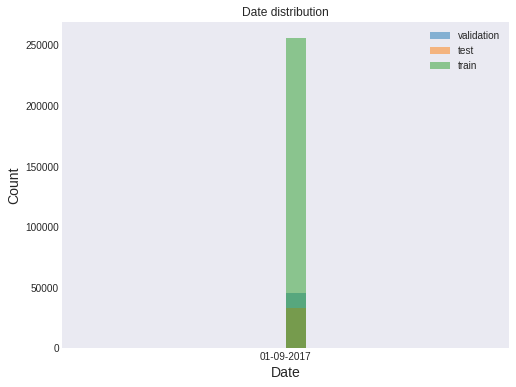

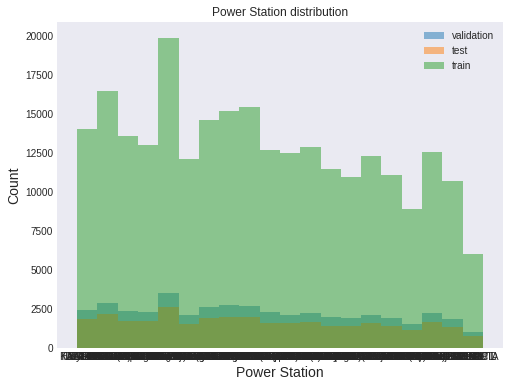

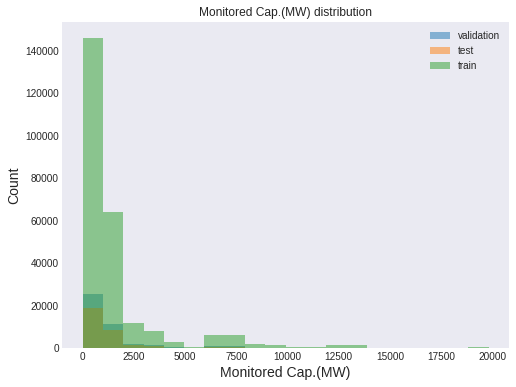

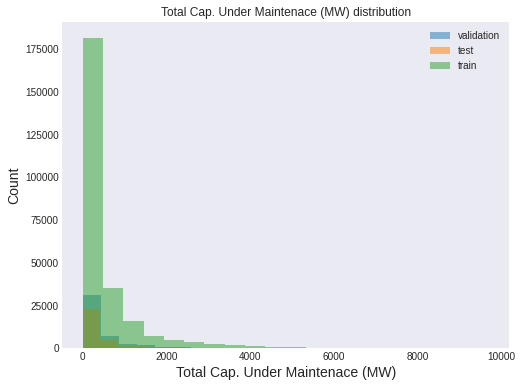

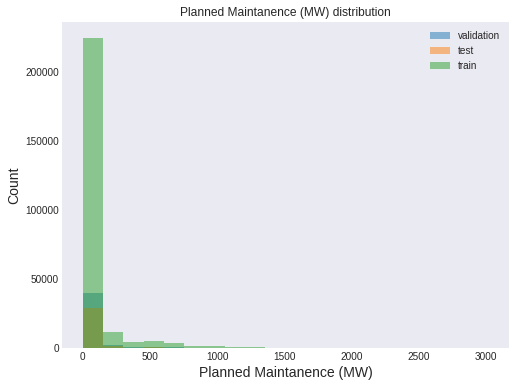

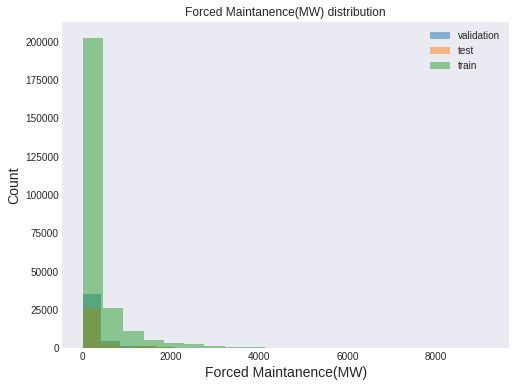

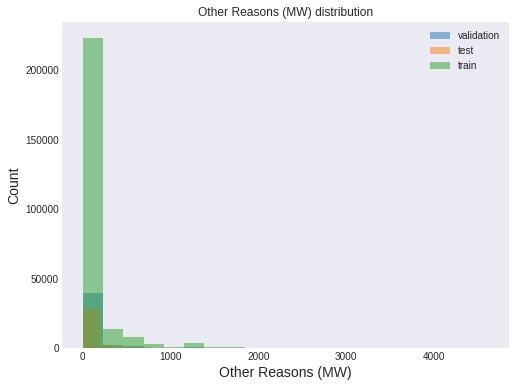

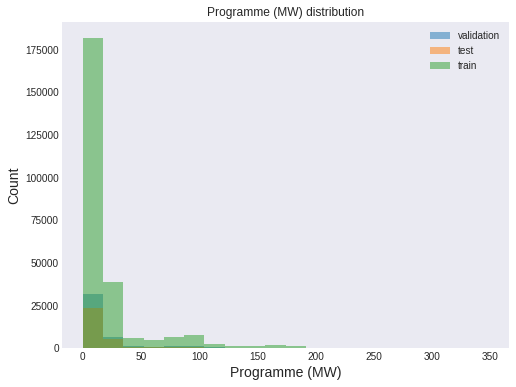

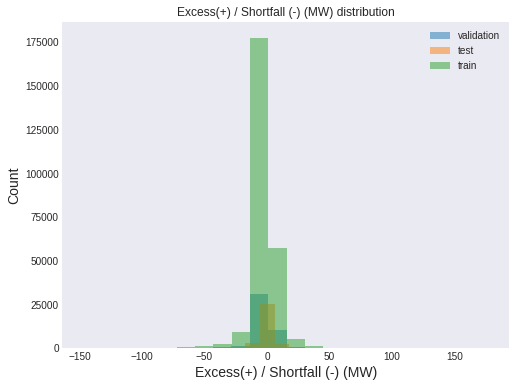

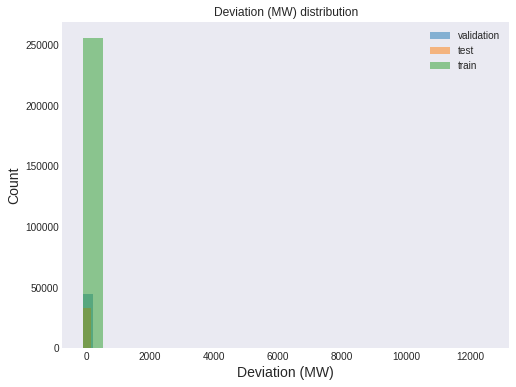

In [37]:
X_test_plot = X_test[['Date', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
        'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)']]
X_val_plot = X_val[['Date', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
        'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)']]
X_train_plot = X_train[['Date', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
        'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)']]
# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

#No. They are from the same distribution but not equal to each other.

#In the predictor variables independent of all the other predictor variables?

To find this, we need to find if there is any correlation between the features.

Let us plot a correlation heatmap to test this.

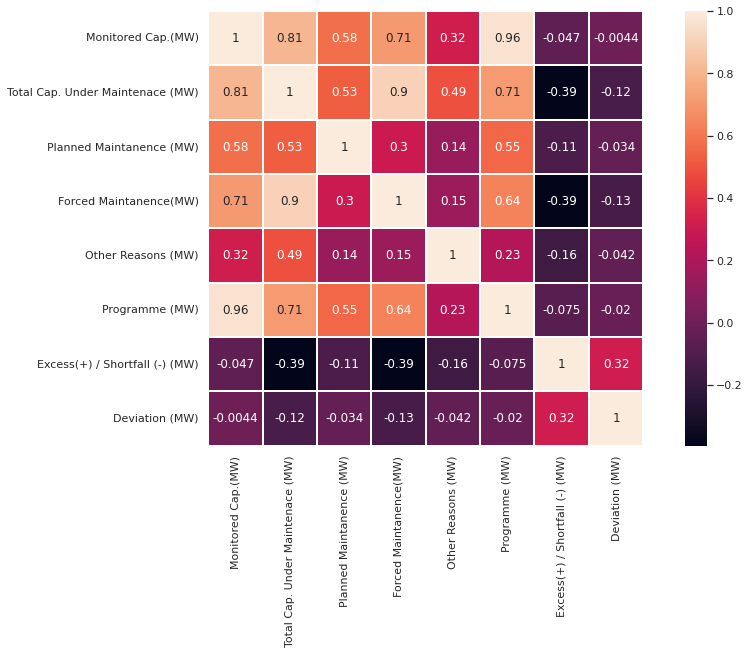

In [39]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X.corr(), linewidths=1, annot = True, square =True , )

The above figure shows that there is multicollinearity present. Thus some predictor variables are dependent on others.

#Which predictor variables are the most important?

For this question, we will use the SelectKBest package to find the top 4 important features.

It uses mutual information (MI) that we have already calculated above to select the K best features.

In [50]:
X_s = df[['Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
       'Actual (MW)', 'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)']]

In [65]:
y=y.astype(int)

In [75]:
X_s

,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW),Deviation (MW)
0,2235.4,135.0,0.0,135.0,0.0,13.29,18.29,5.00,37.62
1,1350.0,1350.0,0.0,1350.0,0.0,0.00,0.00,0.00,0.00
2,150.0,150.0,0.0,150.0,0.0,0.00,0.00,0.00,0.00
3,3960.0,0.0,0.0,0.0,0.0,92.13,96.16,4.03,4.37
4,600.0,300.0,0.0,300.0,0.0,6.84,7.18,0.34,4.97
...,...,...,...,...,...,...,...,...,...
334989,1430.0,500.0,0.0,500.0,0.0,16.50,16.98,0.48,2.91
334990,447.0,0.0,0.0,0.0,0.0,4.29,3.96,-0.33,-7.69
334991,63.0,0.0,0.0,0.0,0.0,0.00,1.22,1.22,0.00
334992,25.2,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00


In [76]:
y

,Actual (MW)
0,18.29
1,0.00
2,0.00
3,96.16
4,7.18
...,...
334989,16.98
334990,3.96
334991,1.22
334992,0.00


In [78]:
y=y.astype(int)

In [79]:
from sklearn.feature_selection import SelectKBest
sel_four_cols = SelectKBest(mutual_info_classif, k=4)
sel_four_cols.fit(X_s, y)
X_s.columns[sel_four_cols.get_support()]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['Monitored Cap.(MW)', 'Programme (MW)', 'Actual (MW)',
       'Deviation (MW)'],
      dtype='object')

In [42]:
df.dtypes

Date                                 object
Power Station                        object
Monitored Cap.(MW)                  float64
Total Cap. Under Maintenace (MW)    float64
Planned Maintanence (MW)            float64
Forced Maintanence(MW)              float64
Other Reasons (MW)                  float64
Programme (MW)                      float64
Actual (MW)                         float64
Excess(+) / Shortfall (-) (MW)      float64
Deviation (MW)                      float64
dtype: object

In [47]:
df_drop=df[['Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
       'Actual (MW)', 'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)']]
      

In [49]:
df_drop.dtypes

Monitored Cap.(MW)                  float64
Total Cap. Under Maintenace (MW)    float64
Planned Maintanence (MW)            float64
Forced Maintanence(MW)              float64
Other Reasons (MW)                  float64
Programme (MW)                      float64
Actual (MW)                         float64
Excess(+) / Shortfall (-) (MW)      float64
Deviation (MW)                      float64
dtype: object

In [82]:
X.columns

Index(['Date', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
       'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)'],
      dtype='object')

In [83]:
X_s

,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW),Deviation (MW)
0,2235.4,135.0,0.0,135.0,0.0,13.29,18.29,5.00,37.62
1,1350.0,1350.0,0.0,1350.0,0.0,0.00,0.00,0.00,0.00
2,150.0,150.0,0.0,150.0,0.0,0.00,0.00,0.00,0.00
3,3960.0,0.0,0.0,0.0,0.0,92.13,96.16,4.03,4.37
4,600.0,300.0,0.0,300.0,0.0,6.84,7.18,0.34,4.97
...,...,...,...,...,...,...,...,...,...
334989,1430.0,500.0,0.0,500.0,0.0,16.50,16.98,0.48,2.91
334990,447.0,0.0,0.0,0.0,0.0,4.29,3.96,-0.33,-7.69
334991,63.0,0.0,0.0,0.0,0.0,0.00,1.22,1.22,0.00
334992,25.2,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00


In [95]:
X_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334994 entries, 0 to 334993
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Monitored Cap.(MW)                334994 non-null  float64
 1   Total Cap. Under Maintenace (MW)  334994 non-null  float64
 2   Planned Maintanence (MW)          334994 non-null  float64
 3   Forced Maintanence(MW)            334994 non-null  float64
 4   Other Reasons (MW)                334994 non-null  float64
 5   Programme (MW)                    334994 non-null  float64
 6   Actual (MW)                       334994 non-null  float64
 7   Excess(+) / Shortfall (-) (MW)    334994 non-null  float64
 8   Deviation (MW)                    334994 non-null  float64
dtypes: float64(9)
memory usage: 23.0 MB


 #Do the ranges of the predictor variables make sense?

In [111]:
import matplotlib.pyplot as plt
for column in X_new:
    sns.boxplot(data=df,x=X_new.columns[k],palette="Blues",ax=axes[i,j])
    plt.show()


In [92]:
X.columns

Index(['Date', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
       'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)'],
      dtype='object')

In [105]:
X_new=X.drop(["Date","Power Station"],axis=1)

In [96]:
X_new[X_new.columns[k]] = X_new[X_new.columns[k]].astype('category')


In [103]:
type(X_new.columns[0])

str

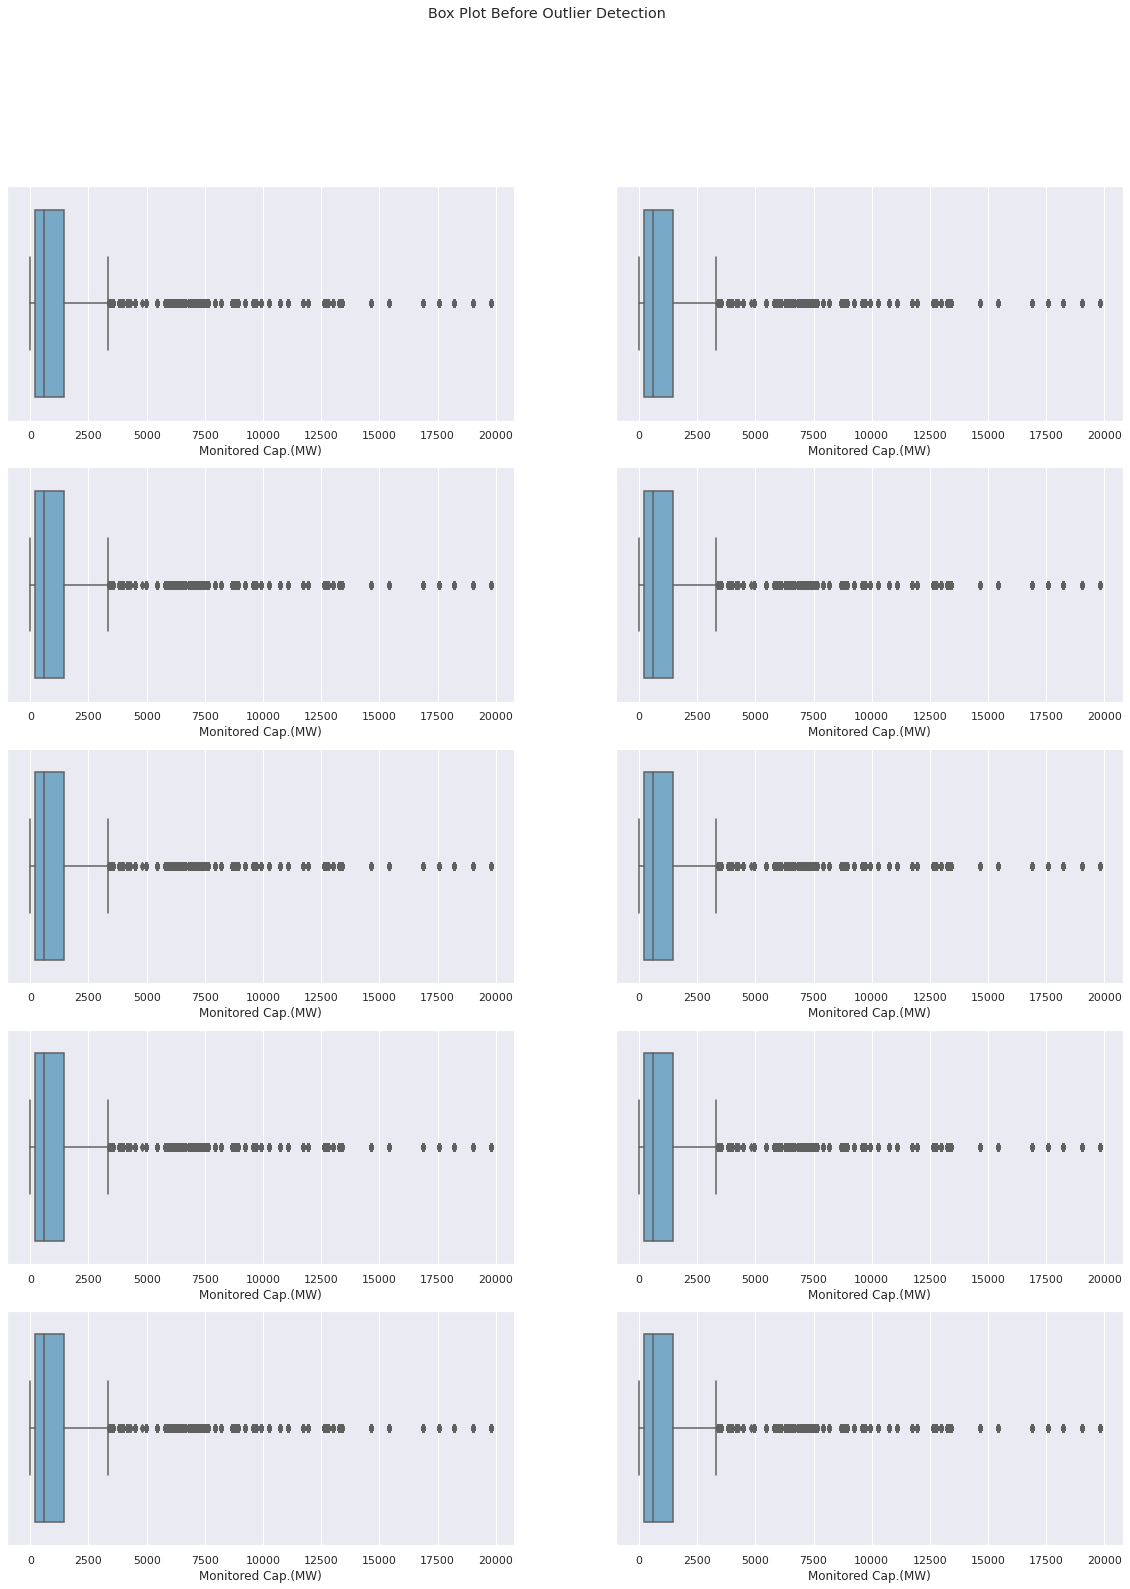

In [113]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
      
        sns.boxplot(data=df,x='Monitored Cap.(MW)',palette="Blues",ax=axes[i,j])
        k=k+1

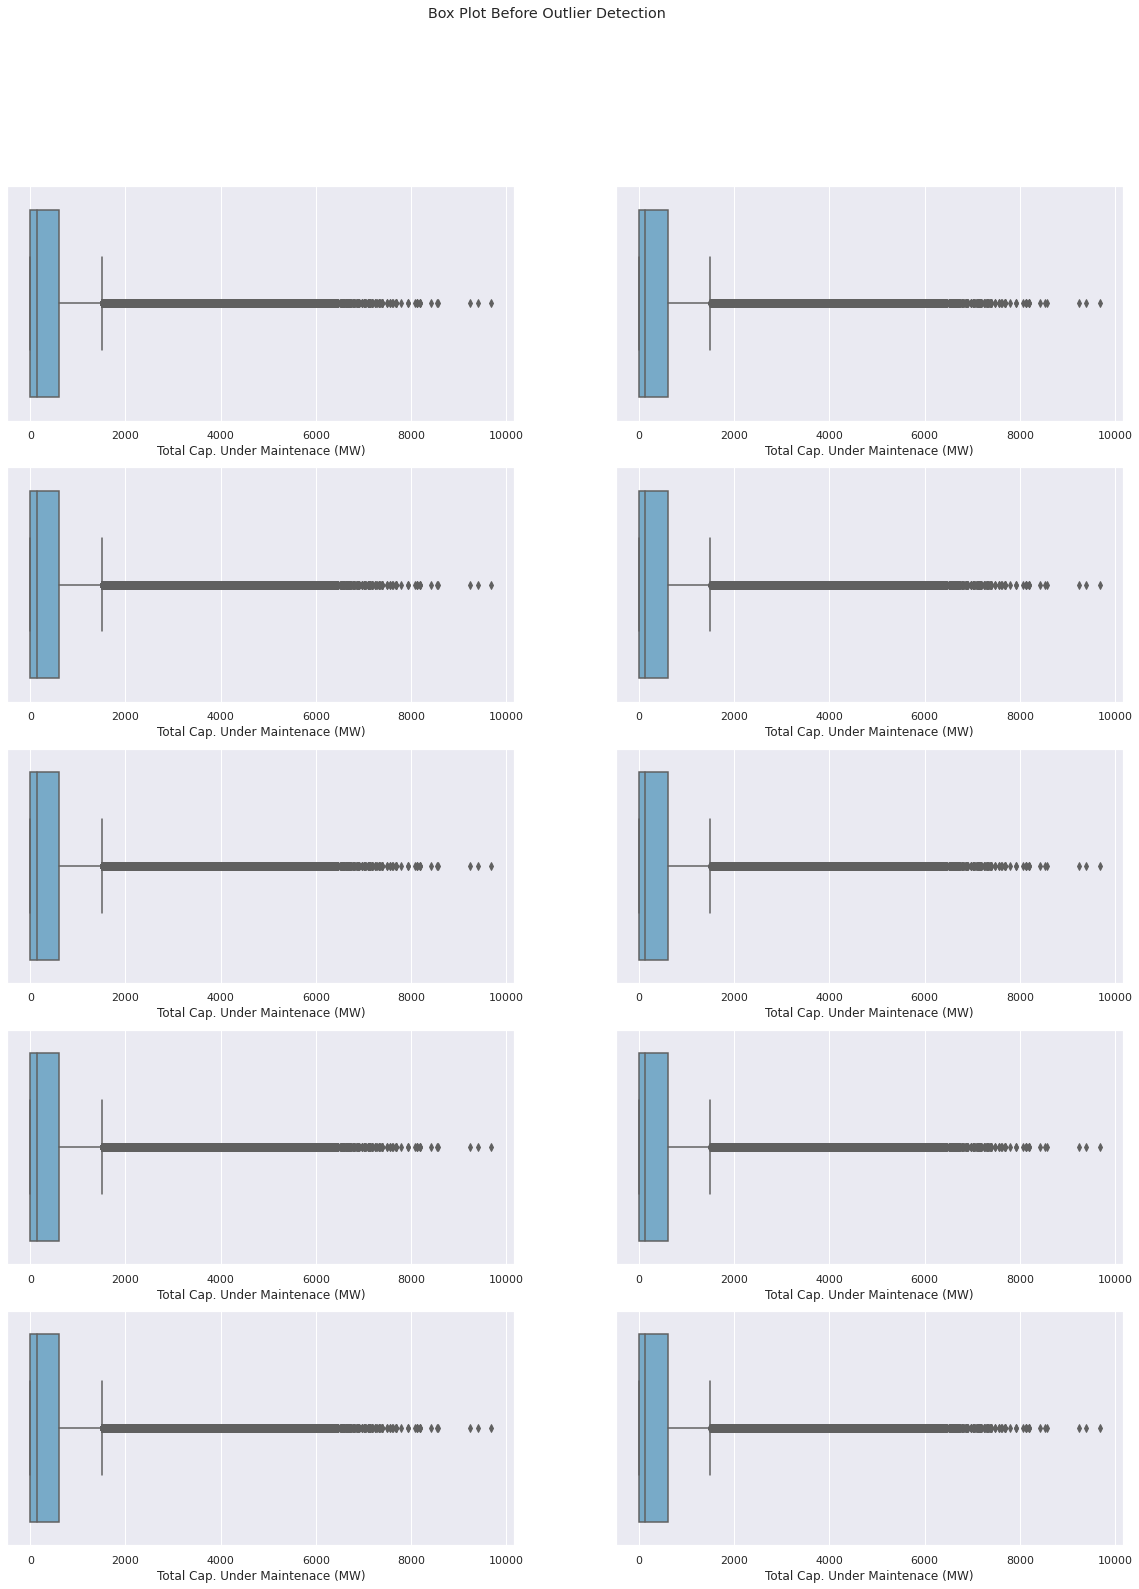

In [114]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
      
        sns.boxplot(data=df,x='Total Cap. Under Maintenace (MW)',palette="Blues",ax=axes[i,j])
        k=k+1

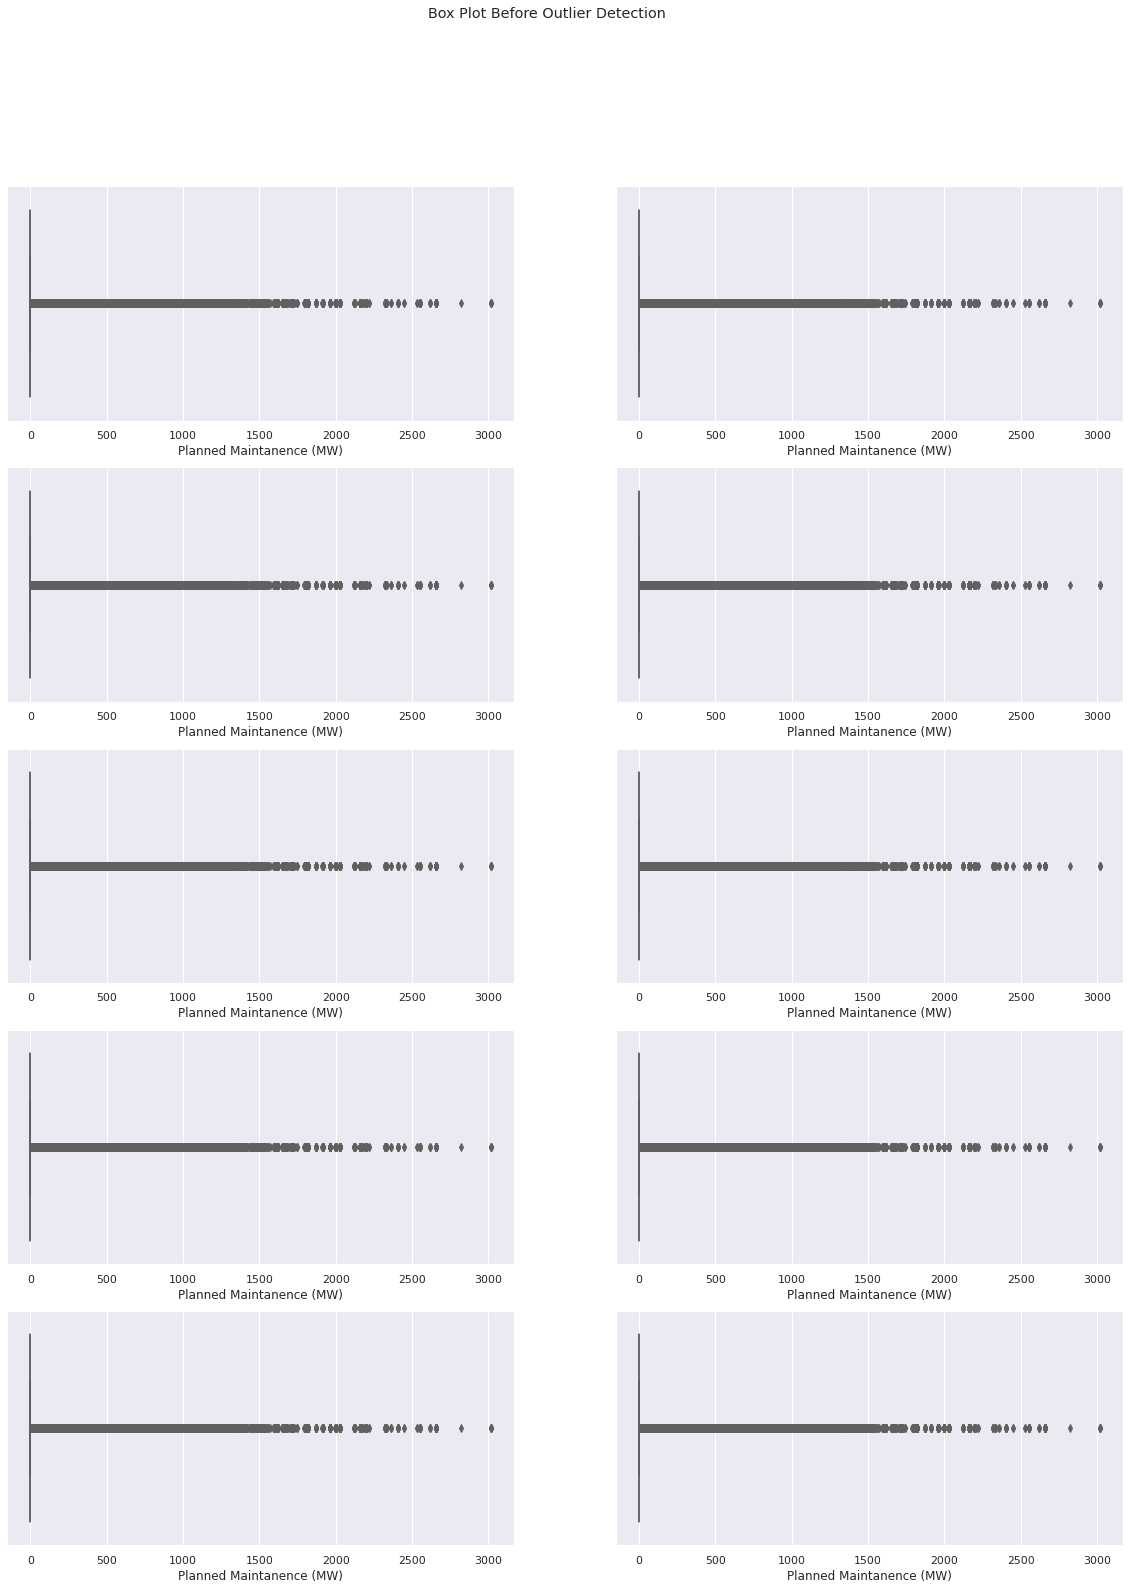

In [115]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
      
        sns.boxplot(data=df,x='Planned Maintanence (MW)',palette="Blues",ax=axes[i,j])
        k=k+1

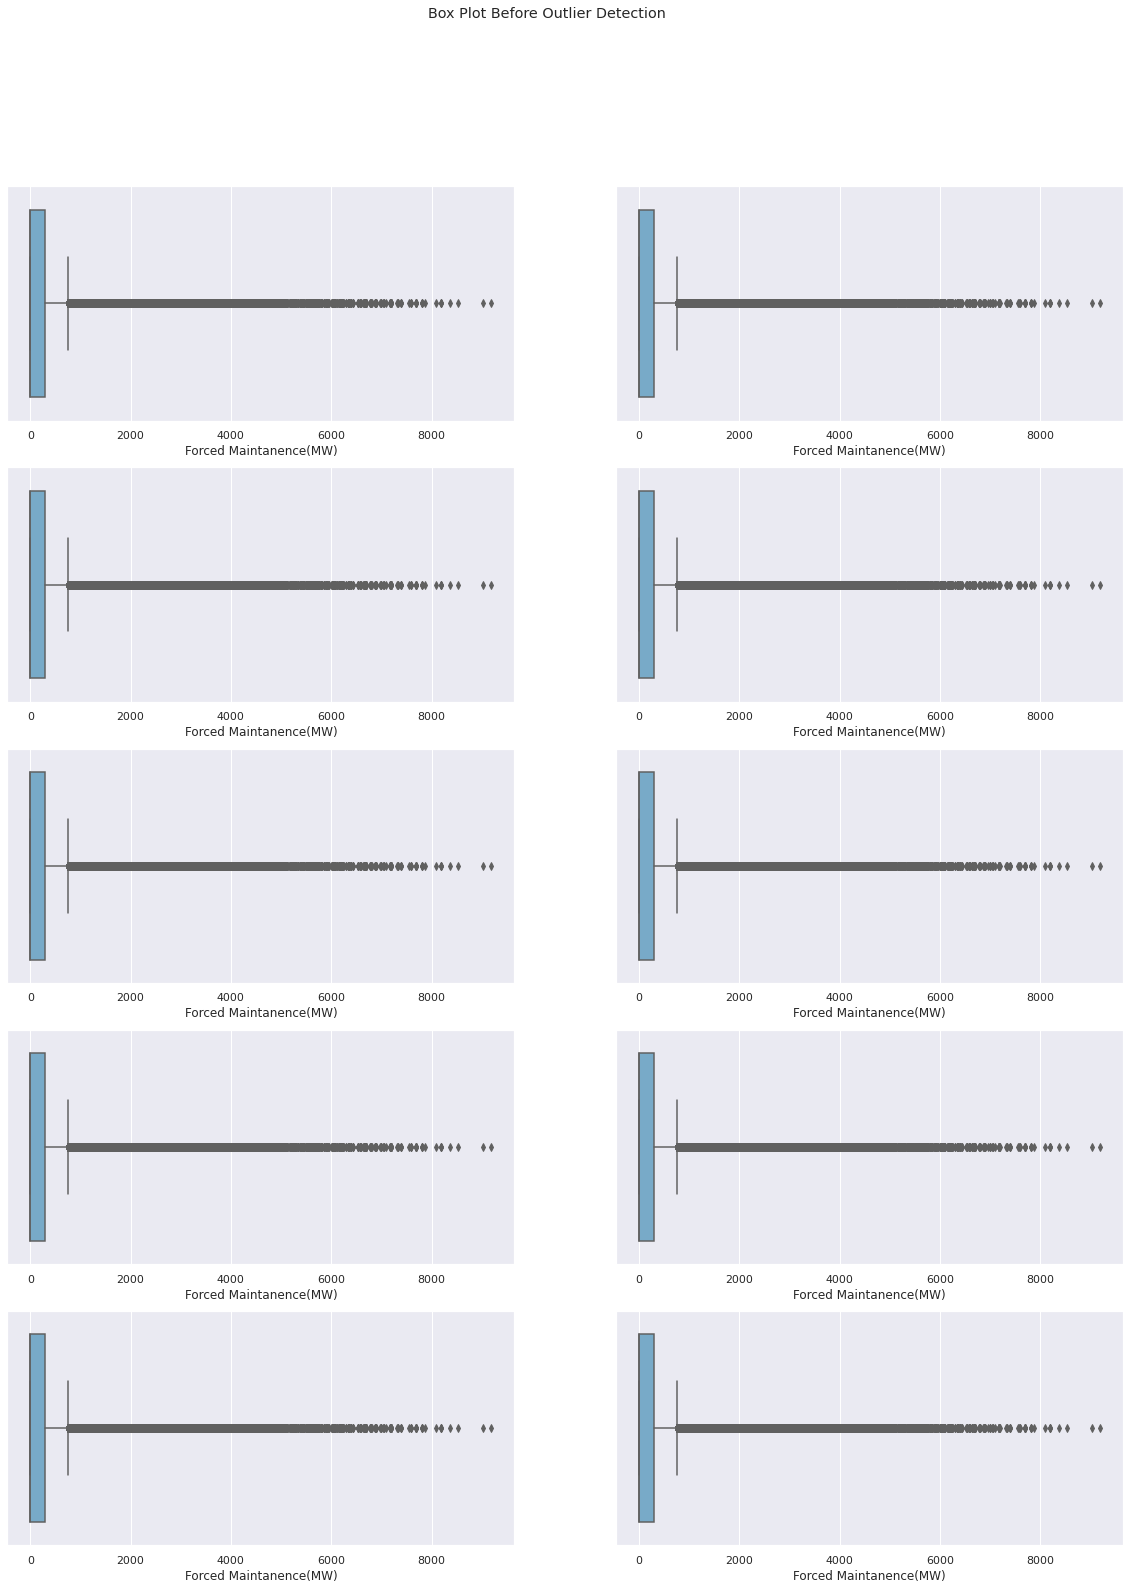

In [116]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
      
        sns.boxplot(data=df,x='Forced Maintanence(MW)',palette="Blues",ax=axes[i,j])
        k=k+1

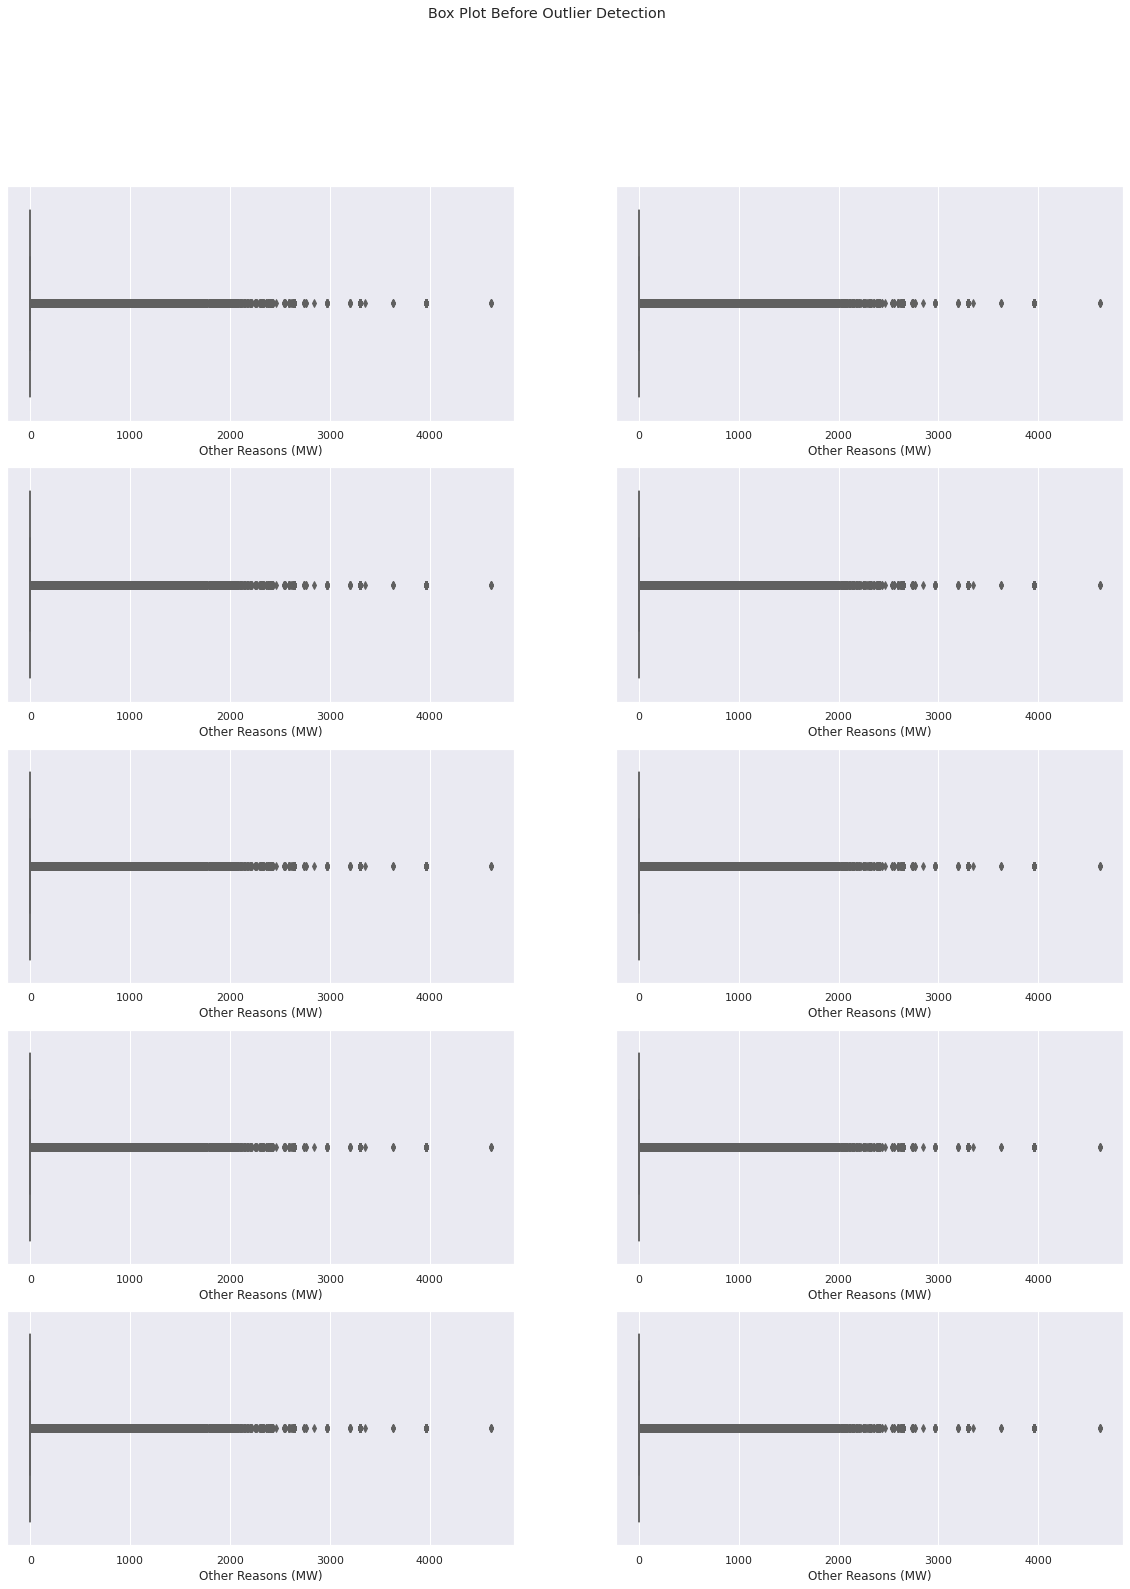

In [117]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
      
        sns.boxplot(data=df,x='Other Reasons (MW)',palette="Blues",ax=axes[i,j])
        k=k+1

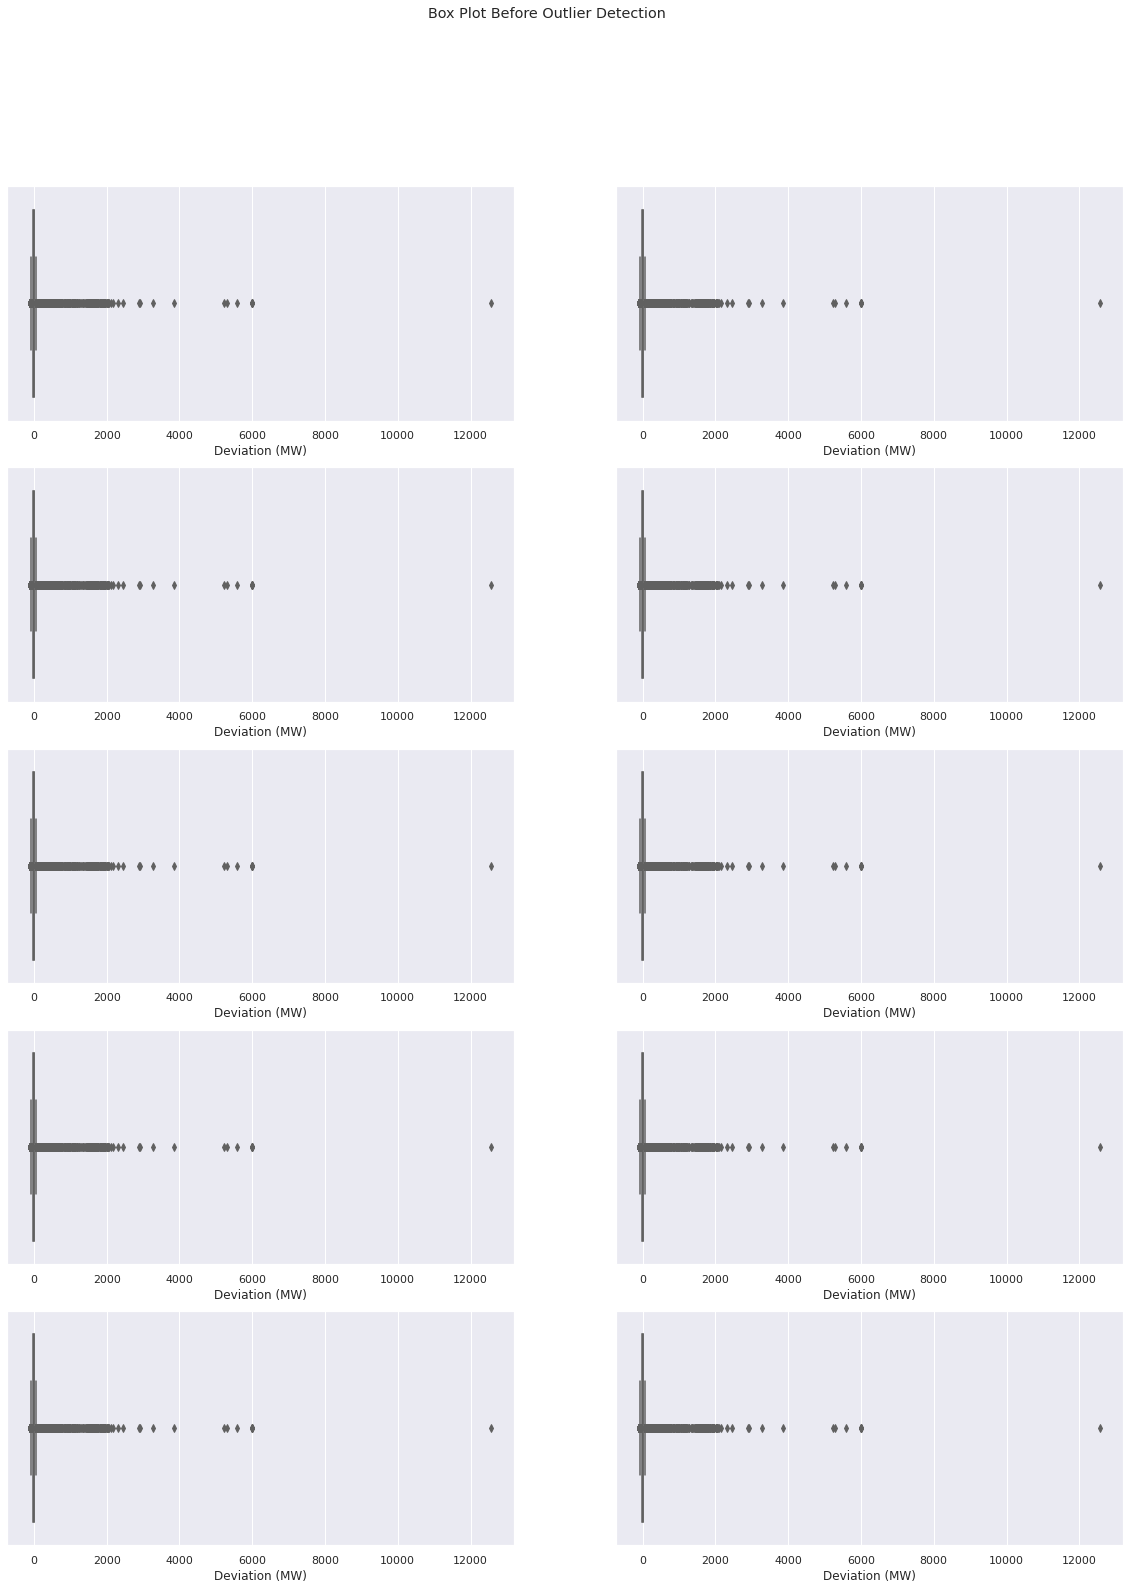

In [120]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
      
        sns.boxplot(data=df,x='Deviation (MW)',palette="Blues",ax=axes[i,j])
        k=k+1

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
lr_model = lr()
lr_model.fit(X_train_scaled,y_train)
y_predicted = lr_model.predict(X_test_scaled)
print("Accuracy of Logistic Regression Model is = {0: .3f}".format(metrics.accuracy_score(y_test,y_predicted)))

 **Q. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

>To test this, let us remove the outliers, fit the logistic Regression model and compare the accuracy.

In [ ]:
# Calculating the IQR
def iqr_calculation(main_df,col):
    Q1 = np.percentile(col,25,interpolation = 'midpoint')
    Q3 = np.percentile(col,75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(col>=(Q3+1.5*IQR))
    lower = np.where(col<=(Q1-1.5*IQR))
    return upper,lower

In [ ]:
# Remove the outliers
def remove_outliers(main_df,upper,lower):
    main_df.drop(upper[0], inplace = True)
    main_df.drop(lower[0], inplace = True)
    print("New Shape: ", main_df.shape)
    return main_df

# Resetting the dataframe index
def reset_dataframe(main_df):
    main_df.reset_index(inplace=True)
    main_df.drop(columns=[''],inplace=True)
    return main_df

In [ ]:
df1 = df.drop(['countries ','ioc_code '],axis = 1)

In [ ]:
df1 = df1.reset_index(drop=True)

In [ ]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

**Q. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [ ]:
df_Programme (MW) = df[['Programme (MW)']]
df_Programme (MW)['Programme (MW)_copy_1_percent'] = df[['Programme (MW)']]
df_Programme (MW)['Programme (MW)_copy_5_percent'] = df[['Programme (MW)']]
df_Programme (MW)['Programme (MW)_copy_10_percent'] = df[['Programme (MW)']]
df_Programme (MW)['Index'] = range(1, len(df_Programme (MW)) + 1)
# df_MinorAxisLength['sample_num'] = df['sample_num']/1000
df_Programme (MW)

<ipython-input-92-118f979fabcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Programme (MW)['Programme (MW)_copy_1_percent'] = df[['Programme (MW)']]
<ipython-input-92-118f979fabcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Programme (MW)['Programme (MW)_copy_5_percent'] = df[['Programme (MW)']]
<ipython-input-92-118f979fabcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Programme (MW)['Programme (MW)_copy_10_percent'] = df[['Programme (MW)']]
<ipython-input-92-118f979fabcd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Programme (MW)['Index'] = range(1, len(df_Programme (MW)) + 1)


##Below function checks the % of missing values




In [ ]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [ ]:
print(get_percent_missing(df_Programme (MW)))

##Below function creates missing values

In [ ]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
create_missing(df_Programme (MW), 0.01, 'Programme (MW)_copy_1_percent')
create_missing(df_Programme (MW), 0.05, 'Programme (MW)_copy_5_percent')
create_missing(df_Programme (MW), 0.1, 'Programme (MW)_copy_10_percent')

In [ ]:
print(get_percent_missing(df_Programme (MW)))

In [ ]:
# Store Index of NaN values in each coloumns
Programme (MW)_1_idx = list(np.where(df_Programme (MW)['Programme (MW)_copy_1_percent'].isna())[0])
Programme (MW)_5_idx = list(np.where(df_Programme (MW)['Programme (MW)_copy_5_percent'].isna())[0])
Programme (MW)_10_idx = list(np.where(df_Programme (MW)['Programme (MW)_copy_10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(Programme (MW)_1_idx)} and it contains {(len(Programme (MW)_1_idx)/len(df_Programme (MW)['Programme (MW)_copy_1_percent']))*100} % of total data in column | Total rows: {len(df_Programme (MW)['Programme (MW)_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(Programme (MW)_5_idx)} and it contains {(len(Programme (MW)_5_idx)/len(df_Programme (MW)['Programme (MW)_copy_5_percent']))*100} % of total data in column | Total rows: {len(df_Programme (MW)['Programme (MW)_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(Programme (MW)_10_idx)} and it contains {(len(Programme (MW)_10_idx)/len(df_Programme (MW)['Programme (MW)_copy_10_percent']))*100} % of total data in column | Total rows: {len(df_Programme (MW)['Programme (MW)_copy_10_percent'])}")

### Perform KNN impute to df_number dataframe



>  KNN imputer uses the K-nearest neighbour algorithm to impute missing values. It analyses k similar points and uses their average as the value to impute.

More about this [here](https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e)



In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
df_Programme (MW)_v2 = df_Programme (MW)[['Index','Programme (MW)_copy_1_percent','Programme (MW)_copy_5_percent','Programme (MW)_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_Programme (MW)_v2), columns = df_Programme (MW)_v2.columns)

In [ ]:
imputed_number_df.sample(10)

In [ ]:
imputed_number_df['original_Programme (MW)'] = df_Programme (MW)['Programme (MW)']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_Programme (MW)'] - imputed_number_df['Programme (MW)_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_Programme (MW)'] - imputed_number_df['Programme (MW)_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_Programme (MW)'] - imputed_number_df['Programme (MW)_copy_10_percent']


In [ ]:
imputed_number_df

In [ ]:
for i in Programme (MW)_10_idx:
    print(str(imputed_number_df['Programme (MW)_copy_10_percent'][i])+", "+str(imputed_number_df['original_Programme (MW)'][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

In [ ]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

print("Error for 1% Imputation =",imputed_number_df['diff_1_percent'].sum(axis=0))
print("Error for 5% Imputation =",imputed_number_df['diff_5_percent'].sum(axis=0))
print("Error for 10% Imputation =",imputed_number_df['diff_10_percent'].sum(axis=0))

In [ ]:
from math import sqrt
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))


In [ ]:
acutual = imputed_number_df['original_Programme (MW)'].sum(axis=0) 
predicted_1_percent = imputed_number_df['Programme (MW)_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['Programme (MW)_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['Programme (MW)_copy_10_percent'].sum(axis=0) 
N = len(Programme (MW)_10_idx) - 1

bias_1_percent = (acutual - predicted_1_percent) / N
bias_5_percent = (acutual - predicted_5_percent) / N
bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",bias_1_percent)
print("Bias for 5 percent missing data is = ",bias_5_percent)
print("Bias for 10 percent missing data is = ",bias_10_percent)

### Imputation Method - Mean Imputation

> The missing values are imputed by mean of the feature.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df_Programme (MW) = df[['Programme (MW)']]
df_Programme (MW)['Programme (MW)_copy_1_percent'] = df[['Programme (MW)']]
df_Programme (MW)['Programme (MW)_copy_5_percent'] = df[['Programme (MW)']]
df_Programme (MW)['Programme (MW)_copy_10_percent'] = df[['Programme (MW)']]
df_Programme (MW)['Index'] = range(1, len(df_Programme (MW)) + 1)
# df_Programme (MW)['sample_num'] = df['sample_num']/1000
df_Programme (MW)

In [ ]:
print(get_percent_missing(df_Programme (MW)))

In [ ]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

print("Error for 1% imputation: ",imputed_number_df['diff_1_percent'].sum(axis=0))
print("Error for 5% imputation: ",imputed_number_df['diff_5_percent'].sum(axis=0))
print("Error for 10% imputation: ",imputed_number_df['diff_10_percent'].sum(axis=0))

In [ ]:
from math import sqrt
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))

In [ ]:
acutual = imputed_number_df['original_Programme (MW)'].sum(axis=0) 
predicted_1_percent = imputed_number_df['Programme (MW)_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['Programme (MW)_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['Programme (MW)_copy_10_percent'].sum(axis=0) 
N = len(Programme (MW)_10_idx) - 1

SimpleImputer_bias_1_percent = (acutual - predicted_1_percent) / N
SimpleImputer_bias_5_percent = (acutual - predicted_5_percent) / N
SimpleImputer_bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",SimpleImputer_bias_1_percent)
print("Bias for 5 percent missing data is = ",SimpleImputer_bias_5_percent)
print("Bias for 10 percent missing data is = ",SimpleImputer_bias_10_percent)

### Imputation Method - Iterative Imputer



> Multivariate imputer that estimates each feature from all the others.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

More on this [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)



In [ ]:
df_Programme (MW) = df[['Programme (MW)']]
df_Programme (MW)['Programme (MW)_copy_1_percent'] = df[['Programme (MW)']]
df_Programme (MW)['Programme (MW)_copy_5_percent'] = df[['Programme (MW)']]
df_Programme (MW)['Programme (MW)_copy_10_percent'] = df[['Programme (MW)']]
df_Programme (MW)['Index'] = range(1, len(df_Programme (MW)) + 1)
# df_MinorAxisLength['sample_num'] = df['sample_num']/1000
df_Programme (MW)

In [ ]:
create_missing(df_Programme (MW), 0.01, 'Programme (MW)_copy_1_percent')
create_missing(df_Programme (MW), 0.05, 'Programme (MW)_copy_5_percent')
create_missing(df_Programme (MW), 0.1, 'Programme (MW)_copy_10_percent')

In [ ]:
# Store Index of NaN values in each coloumns
Programme (MW)_1_idx = list(np.where(df_Programme (MW)['Programme (MW)_copy_1_percent'].isna())[0])
Programme (MW)_5_idx = list(np.where(df_Programme (MW)['Programme (MW)_copy_5_percent'].isna())[0])
Programme (MW)_10_idx = list(np.where(df_Programme (MW)['Programme (MW)_copy_10_percent'].isna())[0])

In [ ]:
df_Programme (MW)_v2 = df_Programme (MW)[['Index','Programme (MW)_copy_1_percent','Programme (MW)_copy_5_percent','Programme (MW)_copy_10_percent']]
imputer = IterativeImputer()
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_Programme (MW)_v2), columns = df_Programme (MW)_v2.columns)

In [ ]:
print(get_percent_missing(imputed_number_df))

In [ ]:
imputed_number_df['original_Programme (MW)'] = df_Programme (MW)['Programme (MW)']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_Programme (MW)'] - imputed_number_df['Programme (MW)_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_Programme (MW)'] - imputed_number_df['Programme (MW)_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_Programme (MW)'] - imputed_number_df['Programme (MW)_copy_10_percent']
print("Difference for 1 percent missing data .. first 3 rows only ",imputed_number_df['diff_1_percent'].head(3).sum(axis=0))
print("Difference for 5 percent missing data .. first 3 rows only ",imputed_number_df['diff_5_percent'].head(3).sum(axis=0))
print("Difference for 10 percent missing data .. first 3 rows only ",imputed_number_df['diff_10_percent'].head(3).sum(axis=0))

In [ ]:
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))

In [ ]:
acutual = imputed_number_df['original_Programme (MW)'].sum(axis=0) 
predicted_1_percent = imputed_number_df['Programme (MW)_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['Programme (MW)_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['Programme (MW)_copy_10_percent'].sum(axis=0) 
N = len(Programme (MW)_10_idx) - 1

SimpleImputer_bias_1_percent = (acutual - predicted_1_percent) / N
SimpleImputer_bias_5_percent = (acutual - predicted_5_percent) / N
SimpleImputer_bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",SimpleImputer_bias_1_percent)
print("Bias for 5 percent missing data is = ",SimpleImputer_bias_5_percent)
print("Bias for 10 percent missing data is = ",SimpleImputer_bias_10_percent)

Copyright (c) 2023 Pilla Kusuma Pravallika

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.